In [30]:
import numpy as np
import pandas as pd
import clean as c
import clusters as clu
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
s2004 = pd.read_csv('data/2004.csv')
s2005 = pd.read_csv('data/2005.csv')
s2006 = pd.read_csv('data/2006.csv')
s2007 = pd.read_csv('data/2007.csv')
s2008 = pd.read_csv('data/2008.csv')
s2009 = pd.read_csv('data/2009.csv')
s2010 = pd.read_csv('data/2010.csv')
s2011 = pd.read_csv('data/2011.csv')
s2012 = pd.read_csv('data/2012.csv')
s2013 = pd.read_csv('data/2013.csv')
s2014 = pd.read_csv('data/2014.csv')
s2015 = pd.read_csv('data/2015.csv')
s2016 = pd.read_csv('data/2016.csv')
s2017 = pd.read_csv('data/2017.csv')
s2018 = pd.read_csv('data/2018.csv')

In [3]:
s2004 = c.all_clean_pels(s2004)
s2005 = c.all_clean_pels(s2005)
s2006 = c.all_clean_pels(s2006)
s2007 = c.all_clean_pels(s2007)
s2008 = c.all_clean_pels(s2008)
s2009 = c.all_clean_pels(s2009)
s2010 = c.all_clean_pels(s2010)
s2011 = c.all_clean_pels(s2011)
s2012 = c.all_clean_pels(s2012)
s2013 = c.all_clean_pels(s2013)
s2014 = c.all_clean(s2014)
s2015 = c.all_clean(s2015)
s2016 = c.all_clean(s2016)
s2017 = c.all_clean(s2017)
s2018 = c.all_clean(s2018)

In [31]:
game_avgs2004 = c.get_team_avgs(s2004)
game_avgs2005 = c.get_team_avgs(s2005)
game_avgs2006 = c.get_team_avgs(s2006)
game_avgs2007 = c.get_team_avgs(s2007)
game_avgs2008 = c.get_team_avgs(s2008)
game_avgs2009 = c.get_team_avgs(s2009)
game_avgs2010 = c.get_team_avgs(s2010)
game_avgs2011 = c.get_team_avgs(s2011)
game_avgs2012 = c.get_team_avgs_2012(s2012)
game_avgs2013 = c.get_team_avgs(s2013)
game_avgs2014 = c.get_team_avgs(s2014)
game_avgs2015 = c.get_team_avgs(s2015)
game_avgs2016 = c.get_team_avgs(s2016)
game_avgs2017 = c.get_team_avgs(s2017)
game_avgs2018 = c.get_team_avgs(s2018)


In [33]:
game_avgs2011

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,3PT_made,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions
team,,,,,,,,,,,,,,,,
76ers,22.695122,4.329268,31.439024,10.365854,19.414634,41.804878,7.573171,12.207317,17.390244,22.573171,5.402439,15.219512,38.109756,82.634146,99.012195,94.841463
Bucks,18.841463,4.865854,30.243902,10.512195,20.512195,40.756098,7.524390,12.512195,17.353659,22.939024,5.890244,17.243902,34.317073,79.804878,91.878049,92.317073
Bulls,22.280488,5.707317,32.365854,11.792683,19.987805,44.158537,7.219512,13.463415,18.195122,24.487805,6.231707,17.256098,37.097561,80.329268,98.621951,93.792683
Cavaliers,20.975610,4.158537,29.865854,10.439024,20.097561,40.304878,6.634146,13.719512,18.853659,25.304878,6.207317,18.158537,35.195122,81.060976,95.451220,94.780488
Celtics,23.426829,4.195122,31.000000,7.792683,20.463415,38.792683,8.243902,13.597561,17.792683,23.109756,4.975610,13.646341,36.865854,75.841463,96.500000,89.439024
Clippers,22.109756,4.902439,30.500000,11.646341,21.134146,42.146341,7.134146,15.524390,18.853659,26.670732,6.256098,18.524390,36.768293,80.414634,98.646341,95.939024
Grizzlies,20.621951,5.378049,29.158537,11.829268,20.792683,40.987805,9.402439,13.426829,18.121951,24.158537,3.768293,11.292683,39.024390,82.939024,99.939024,96.365854
Hawks,21.975610,4.158537,30.000000,9.292683,18.951220,39.292683,6.060976,12.780488,16.414634,21.073171,6.121951,17.402439,36.231707,78.402439,95.000000,91.182927
Heat,19.987805,5.243902,32.512195,9.634146,20.414634,42.146341,6.634146,13.219512,21.463415,27.902439,6.670732,18.036585,36.963415,76.841463,102.060976,90.060976


In [34]:
#2004 doesnt have all 30 teams
teams = game_avgs2005.index


In [35]:
s_comb=game_avgs2017
s_comb=s_comb.append(game_avgs2016).append(game_avgs2015)

In [36]:
s_comb=s_comb.groupby('team').mean()

In [37]:
s_comb

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,3PT_made,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions
team,,,,,,,,,,,,,,,,
76ers,21.939024,5.686992,31.894309,10.414634,21.752033,42.308943,8.784553,16.158537,16.247967,22.800813,9.296748,27.873984,35.865854,83.955285,97.276423,100.113821
Bucks,23.621951,5.345528,31.390244,9.983740,21.012195,41.373984,8.646341,14.654472,16.735772,22.097561,6.930894,19.203252,38.252033,82.016260,100.170732,96.670732
Bulls,22.365854,5.443089,34.463415,11.646341,18.272358,46.109756,6.715447,13.162602,18.073171,22.906504,7.800813,21.987805,37.947154,85.804878,101.768293,98.967480
Cavaliers,22.491870,4.008130,33.378049,10.365854,18.951220,43.743902,6.882114,13.231707,17.142276,22.886179,11.272358,30.325203,38.760163,83.699187,105.934959,96.930894
Celtics,24.630081,3.991870,32.991870,10.585366,21.219512,43.577236,8.304878,13.126016,17.569106,22.398374,9.601626,28.069106,38.930894,87.426829,105.032520,100.552846
Clippers,23.382114,4.947154,33.443089,9.117886,20.817073,42.560976,7.971545,12.215447,18.471545,25.800813,10.020325,26.979675,39.069106,82.963415,106.630081,95.178862
Grizzlies,21.211382,4.231707,31.512195,10.804878,21.097561,42.317073,8.443089,12.699187,18.426829,23.621951,6.886179,20.065041,36.991870,83.235772,99.296748,95.934959
Hawks,24.995935,5.134146,33.235772,9.089431,18.365854,42.325203,8.792683,14.402439,16.727642,22.000000,9.601626,26.890244,38.260163,83.495935,102.849593,97.898374
Heat,20.638211,5.589431,32.426829,9.861789,19.585366,42.288618,7.247967,13.239837,16.634146,22.752033,7.569106,21.756098,37.548780,81.560976,99.300813,94.800813


In [38]:
s_comb=normalize(s_comb)

In [39]:
pd.DataFrame(s_comb,index=teams)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
team,,,,,,,,,,,,,,,,
76ers,0.119495,0.030975,0.173718,0.056725,0.118476,0.230443,0.047847,0.088010,0.088497,0.124188,0.050636,0.151820,0.195349,0.457276,0.529832,0.545287
Bucks,0.130294,0.029485,0.173142,0.055068,0.115899,0.228210,0.047691,0.080831,0.092311,0.121885,0.038229,0.105921,0.210990,0.452384,0.552520,0.533215
Bulls,0.119754,0.029144,0.184529,0.062358,0.097836,0.246887,0.035957,0.070477,0.096770,0.122649,0.041768,0.117730,0.203182,0.459428,0.544901,0.529905
Cavaliers,0.119833,0.021355,0.177833,0.055228,0.100969,0.233061,0.036667,0.070497,0.091331,0.121934,0.060057,0.161568,0.206508,0.445937,0.564406,0.516433
Celtics,0.129086,0.020921,0.172911,0.055478,0.111212,0.228389,0.043526,0.068794,0.092080,0.117390,0.050322,0.147110,0.204037,0.458205,0.550476,0.526998
Clippers,0.125155,0.026480,0.179007,0.048804,0.111425,0.227811,0.042668,0.065384,0.098870,0.138101,0.053635,0.144411,0.209121,0.444069,0.570746,0.509453
Grizzlies,0.117203,0.023382,0.174120,0.059702,0.116574,0.233823,0.046652,0.070169,0.101817,0.130523,0.038050,0.110869,0.204398,0.459919,0.548664,0.530088
Hawks,0.134713,0.027670,0.179121,0.048987,0.098981,0.228108,0.047387,0.077621,0.090152,0.118567,0.051747,0.144922,0.206200,0.449994,0.554298,0.527614
Heat,0.114940,0.031129,0.180594,0.054923,0.109076,0.235517,0.040366,0.073736,0.092640,0.126712,0.042154,0.121166,0.209119,0.454235,0.553033,0.527972


In [40]:
km = KMeans(n_clusters=5,n_init=20)

In [41]:
km.fit(s_comb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
km.labels_

array([2, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3, 0, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3,
       4, 3, 2, 3, 0, 1, 1, 3], dtype=int32)

In [43]:
{i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}


{0: array([ 1,  6, 11, 26]),
 1: array([ 3,  4,  5,  7, 15, 27, 28]),
 2: array([ 0, 12, 13, 14, 20, 24]),
 3: array([ 2,  8,  9, 10, 16, 17, 18, 19, 21, 23, 25, 29]),
 4: array([22])}

In [44]:
s2015.columns

Index(['+/-', 'AST', 'BLK', 'DREB', 'Min', 'Name', 'OREB', 'PF', 'PTS', 'REB',
       'STL', 'TO', 'game_id', 'starter', 'team', 'Position', 'home_team',
       'days_after_opener', 'FT_made', 'FT_attempts', '3PT_made',
       '3PT_attempts', 'FG_made', 'FG_attempts', 'Total_PTS'],
      dtype='object')

In [141]:
comb_3,clusters =clu.create_clusters(s2015,s2016,s2017)

In [142]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [143]:
clusters.labels_

array([4, 0, 3, 2, 4, 1, 0, 4, 3, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 0, 3, 3, 0, 4, 2, 0], dtype=int32)

In [144]:
{i: np.where(clusters.labels_ == i)[0] for i in range(5)}


{0: array([ 1,  6, 11, 23, 26, 29]),
 1: array([ 5, 21]),
 2: array([ 3, 22, 28]),
 3: array([ 2,  8,  9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 24, 25]),
 4: array([ 0,  4,  7, 15, 27])}

In [145]:
comb_3['cluster']=clusters.labels_

In [146]:
comb_3=pd.concat((comb_3,pd.get_dummies(comb_3['cluster'],prefix='cluster')),axis=1)

In [147]:
comb_3.drop('cluster',axis=1,inplace=True)

In [148]:
comb_3

,AST,BLK,DREB,OREB,PF,REB,STL,TO,FT_made,FT_attempts,...,3PT_attempts,FG_made,FG_attempts,AVG_score,Possessions,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
team,,,,,,,,,,,,,,,,,,,,,
76ers,21.939024,5.686992,31.894309,10.414634,21.752033,42.308943,8.784553,16.158537,16.247967,22.800813,...,27.873984,35.865854,83.955285,97.276423,100.113821,0,0,0,0,1
Bucks,23.621951,5.345528,31.390244,9.983740,21.012195,41.373984,8.646341,14.654472,16.735772,22.097561,...,19.203252,38.252033,82.016260,100.170732,96.670732,1,0,0,0,0
Bulls,22.365854,5.443089,34.463415,11.646341,18.272358,46.109756,6.715447,13.162602,18.073171,22.906504,...,21.987805,37.947154,85.804878,101.768293,98.967480,0,0,0,1,0
Cavaliers,22.491870,4.008130,33.378049,10.365854,18.951220,43.743902,6.882114,13.231707,17.142276,22.886179,...,30.325203,38.760163,83.699187,105.934959,96.930894,0,0,1,0,0
Celtics,24.630081,3.991870,32.991870,10.585366,21.219512,43.577236,8.304878,13.126016,17.569106,22.398374,...,28.069106,38.930894,87.426829,105.032520,100.552846,0,0,0,0,1
Clippers,23.382114,4.947154,33.443089,9.117886,20.817073,42.560976,7.971545,12.215447,18.471545,25.800813,...,26.979675,39.069106,82.963415,106.630081,95.178862,0,1,0,0,0
Grizzlies,21.211382,4.231707,31.512195,10.804878,21.097561,42.317073,8.443089,12.699187,18.426829,23.621951,...,20.065041,36.991870,83.235772,99.296748,95.934959,1,0,0,0,0
Hawks,24.995935,5.134146,33.235772,9.089431,18.365854,42.325203,8.792683,14.402439,16.727642,22.000000,...,26.890244,38.260163,83.495935,102.849593,97.898374,0,0,0,0,1
Heat,20.638211,5.589431,32.426829,9.861789,19.585366,42.288618,7.247967,13.239837,16.634146,22.752033,...,21.756098,37.548780,81.560976,99.300813,94.800813,0,0,0,1,0


In [149]:
cluster_0=comb_3[comb_3['cluster_0']==1]

In [150]:
cluster_1=comb_3[comb_3['cluster_1']==1]

In [151]:
cluster_2=comb_3[comb_3['cluster_2']==1]

In [152]:
cluster_3=comb_3[comb_3['cluster_3']==1]

In [153]:
cluster_4=comb_3[comb_3['cluster_4']==1]

In [154]:
cluster_0_bar=pd.DataFrame(cluster_0.mean())

<Container object of 21 artists>

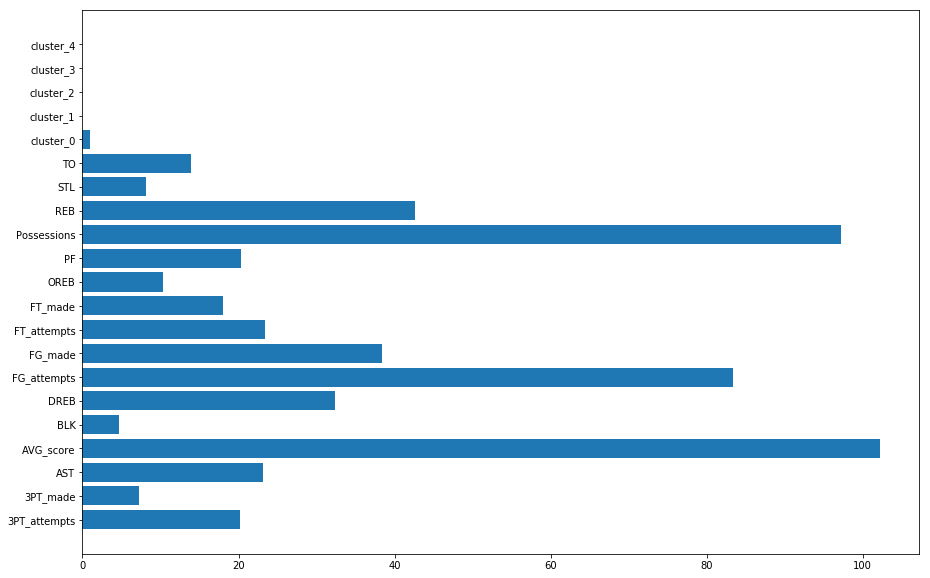

In [155]:
plt.figure(figsize=(15,10))
plt.barh(cluster_0_bar.index,cluster_0_bar[0])

In [156]:
cluster_1_bar=pd.DataFrame(cluster_1.mean())

<Container object of 21 artists>

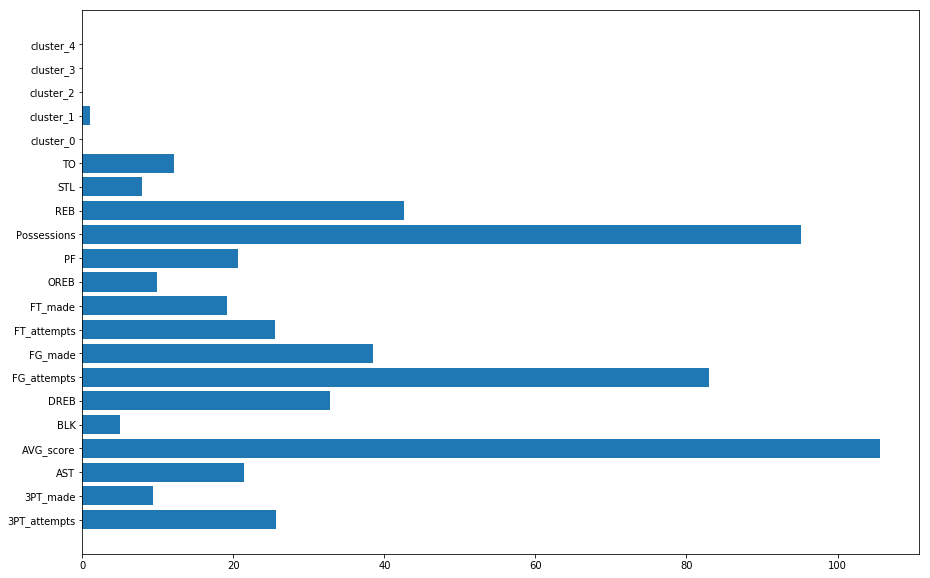

In [157]:
plt.figure(figsize=(15,10))
plt.barh(cluster_1_bar.index,cluster_1_bar[0])

In [158]:
cluster_2_bar=pd.DataFrame(cluster_2.mean())

<Container object of 21 artists>

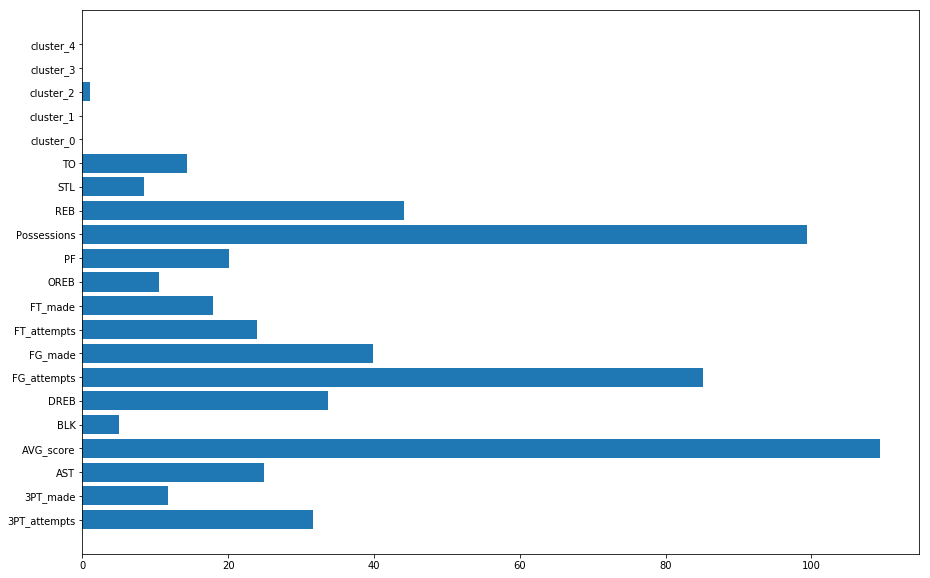

In [159]:
plt.figure(figsize=(15,10))
plt.barh(cluster_2_bar.index,cluster_2_bar[0])

In [160]:
cluster_3_bar=pd.DataFrame(cluster_3.mean())

<Container object of 21 artists>

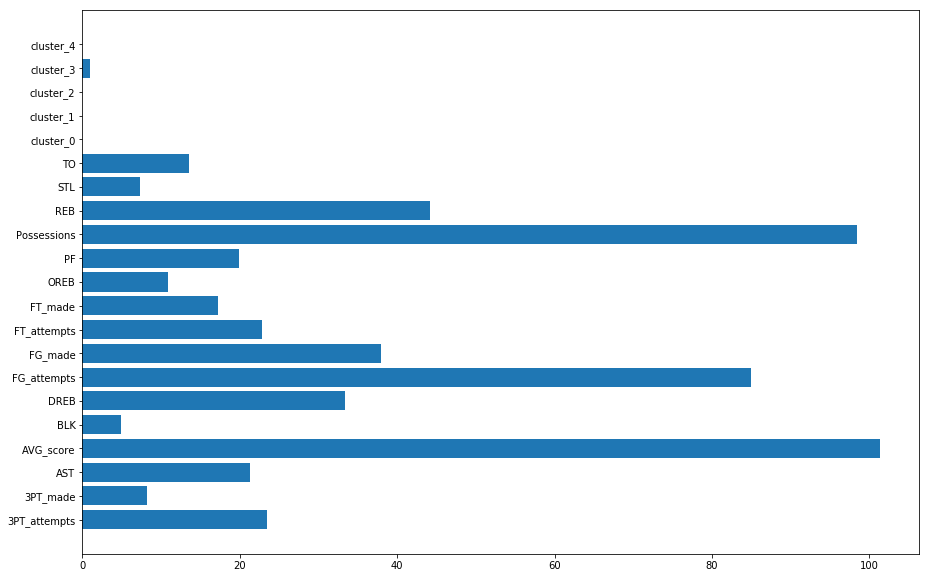

In [161]:
plt.figure(figsize=(15,10))
plt.barh(cluster_3_bar.index,cluster_3_bar[0])

In [162]:
cluster_4_bar=pd.DataFrame(cluster_4.mean())

<Container object of 21 artists>

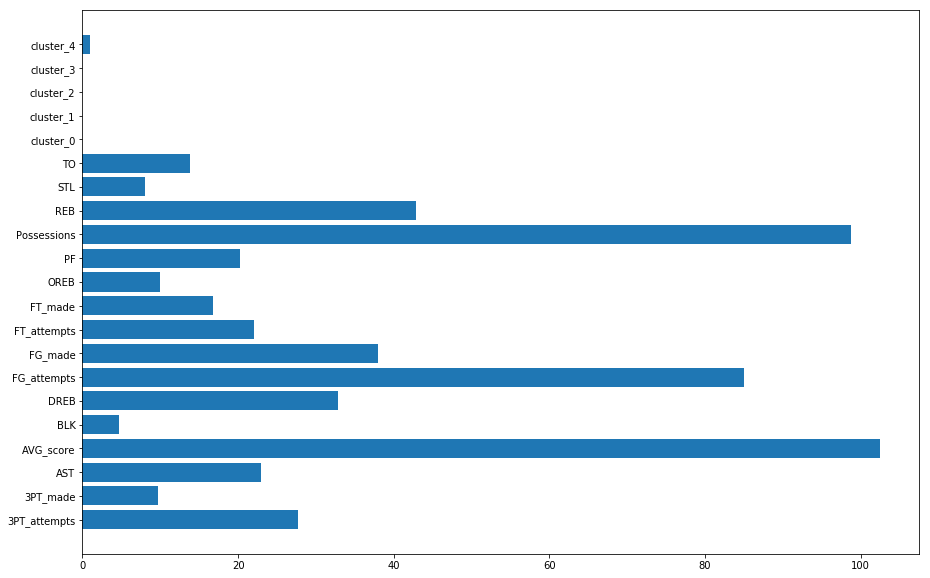

In [163]:
plt.figure(figsize=(15,10))
plt.barh(cluster_4_bar.index,cluster_4_bar[0])

<Container object of 21 artists>

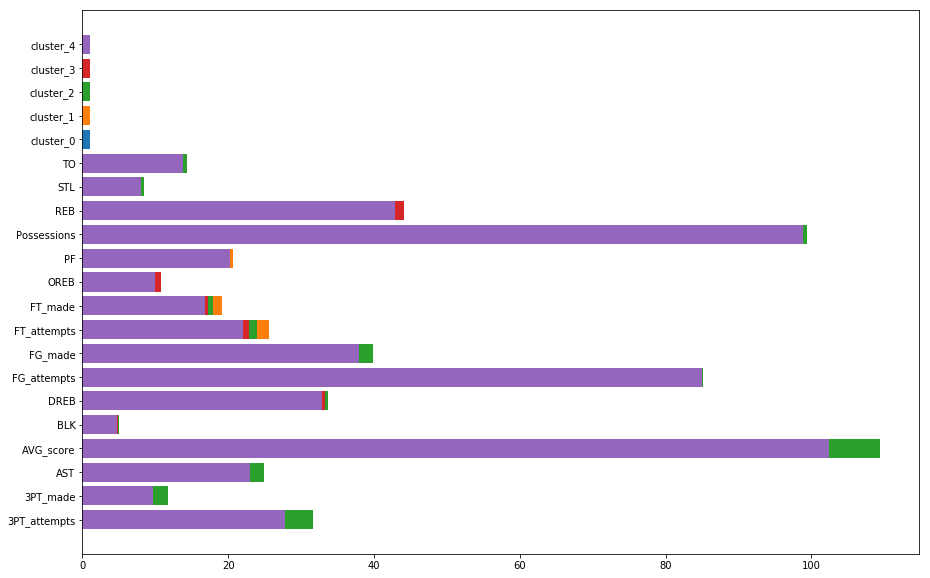

In [164]:
plt.figure(figsize=(15,10))
plt.barh(cluster_0_bar.index,cluster_0_bar[0])
plt.barh(cluster_1_bar.index,cluster_1_bar[0])
plt.barh(cluster_2_bar.index,cluster_2_bar[0])
plt.barh(cluster_3_bar.index,cluster_3_bar[0])
plt.barh(cluster_4_bar.index,cluster_4_bar[0])

In [165]:
c_0=pd.DataFrame(cluster_0.drop(['AVG_score','FG_attempts','Possessions','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())

<Container object of 13 artists>

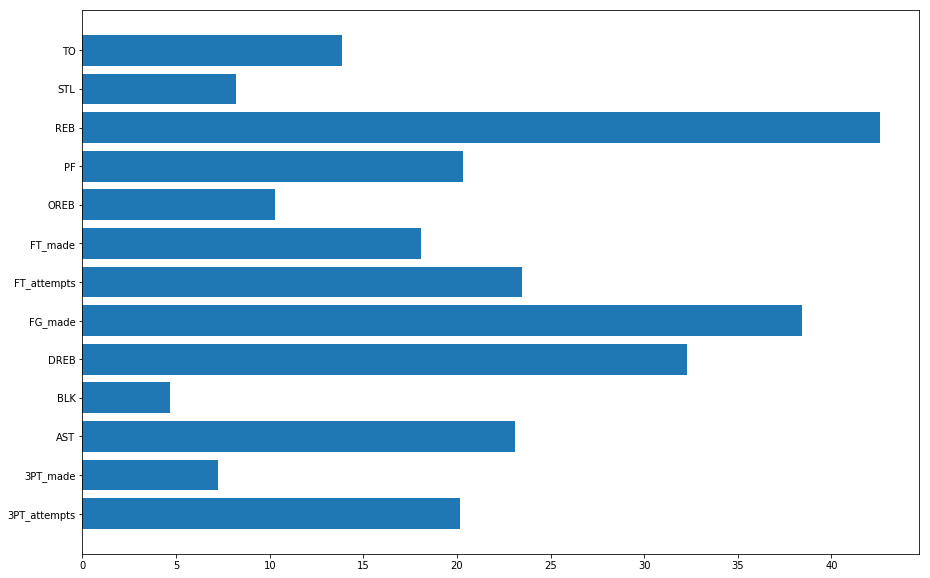

In [166]:
plt.figure(figsize=(15,10))
plt.barh(c_0.index,c_0[0])

<Container object of 13 artists>

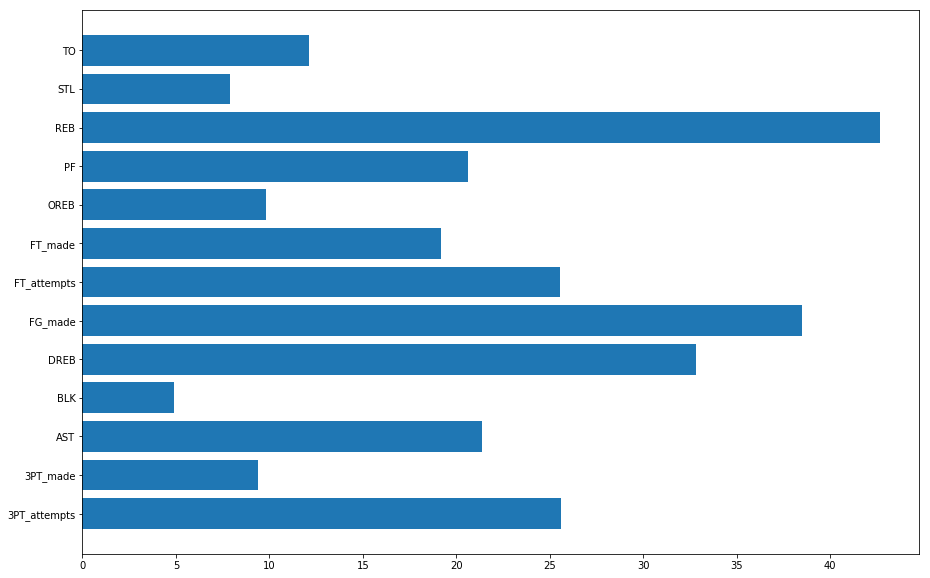

In [167]:
c_1=pd.DataFrame(cluster_1.drop(['AVG_score','FG_attempts','Possessions','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_1.index,c_1[0])

<Container object of 13 artists>

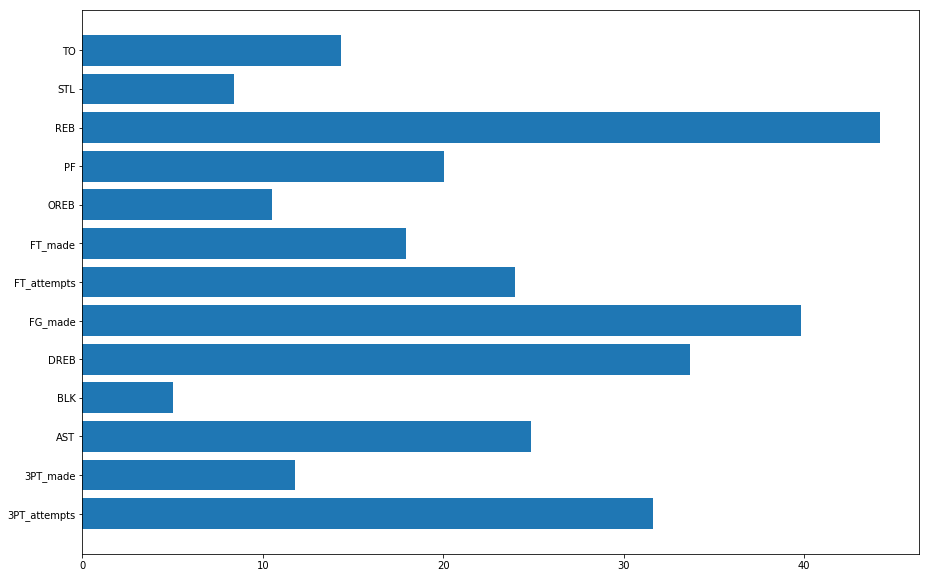

In [168]:
c_2=pd.DataFrame(cluster_2.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_2.index,c_2[0])

<Container object of 13 artists>

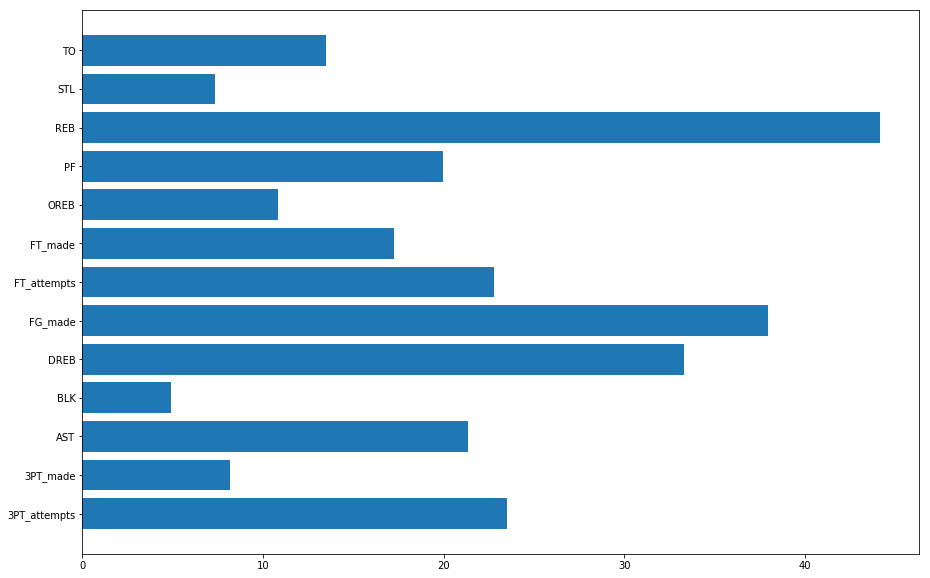

In [169]:
c_3=pd.DataFrame(cluster_3.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_3.index,c_3[0])

<Container object of 13 artists>

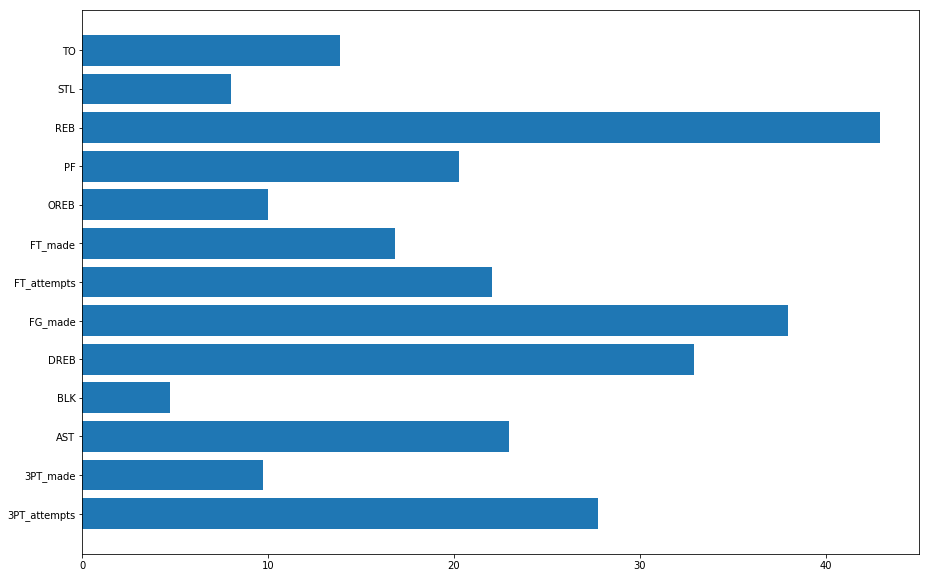

In [170]:
c_4=pd.DataFrame(cluster_4.drop(['Possessions','AVG_score','FG_attempts','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'],axis=1).mean())
plt.figure(figsize=(15,10))
plt.barh(c_4.index,c_4[0])

In [171]:
bar_width = 0.15
index = np.arange(len(c_4))

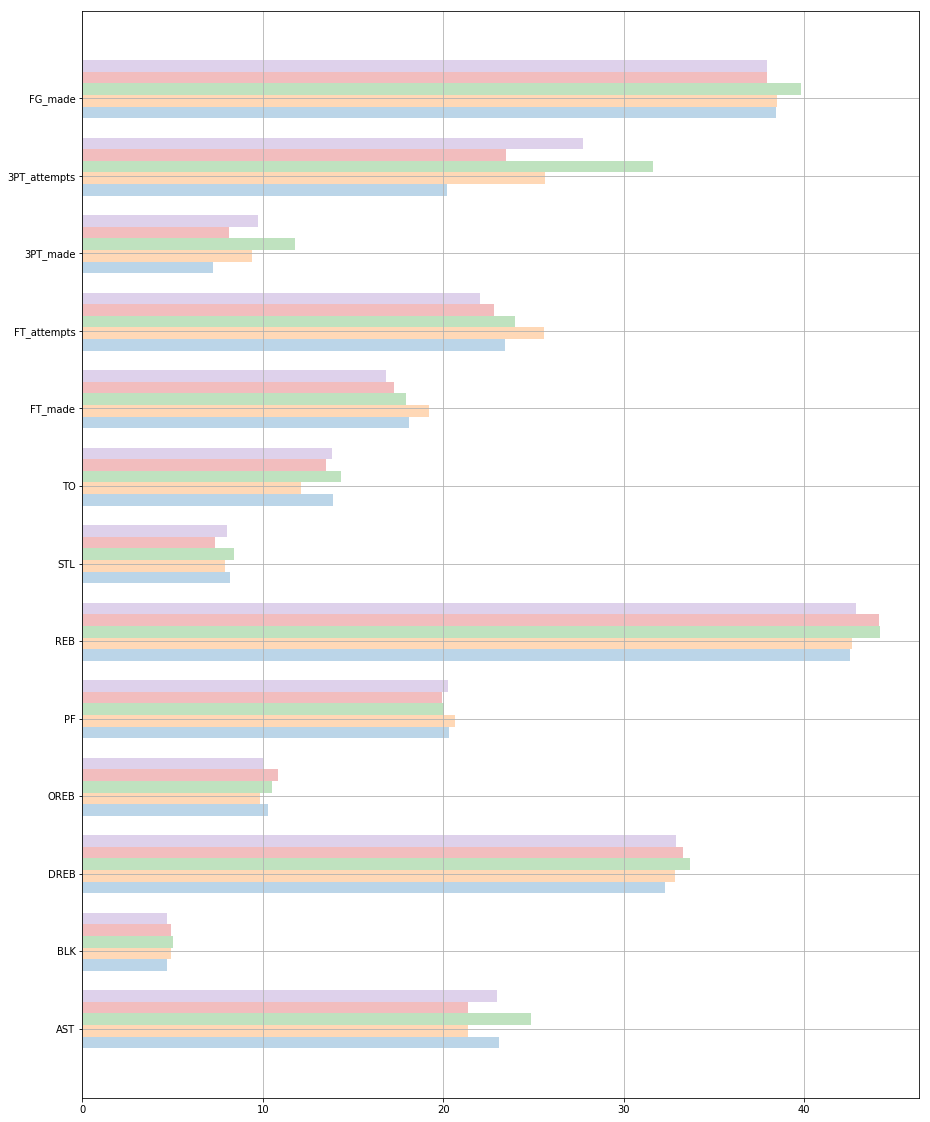

In [172]:
plt.figure(figsize=(15,20))
plt.barh(index-bar_width,c_0[0],bar_width,alpha=.3)
plt.barh(index,c_1[0],bar_width,alpha=.3)
plt.barh(index+bar_width,c_2[0],bar_width,alpha=.3)
plt.barh(index+2*bar_width,c_3[0],bar_width,alpha=.3)
plt.barh(index+3*bar_width,c_4[0],bar_width,alpha=.3)
plt.yticks(index + bar_width / 5, c_4.index)
plt.grid()

In [173]:
c_0=pd.DataFrame(cluster_0[['Possessions','AVG_score','FG_attempts']].mean())
c_1=pd.DataFrame(cluster_1[['Possessions','AVG_score','FG_attempts']].mean())
c_2=pd.DataFrame(cluster_2[['Possessions','AVG_score','FG_attempts']].mean())
c_3=pd.DataFrame(cluster_3[['Possessions','AVG_score','FG_attempts']].mean())
c_4=pd.DataFrame(cluster_4[['Possessions','AVG_score','FG_attempts']].mean())

In [174]:
bar_width = 0.15
index = np.arange(len(c_4))

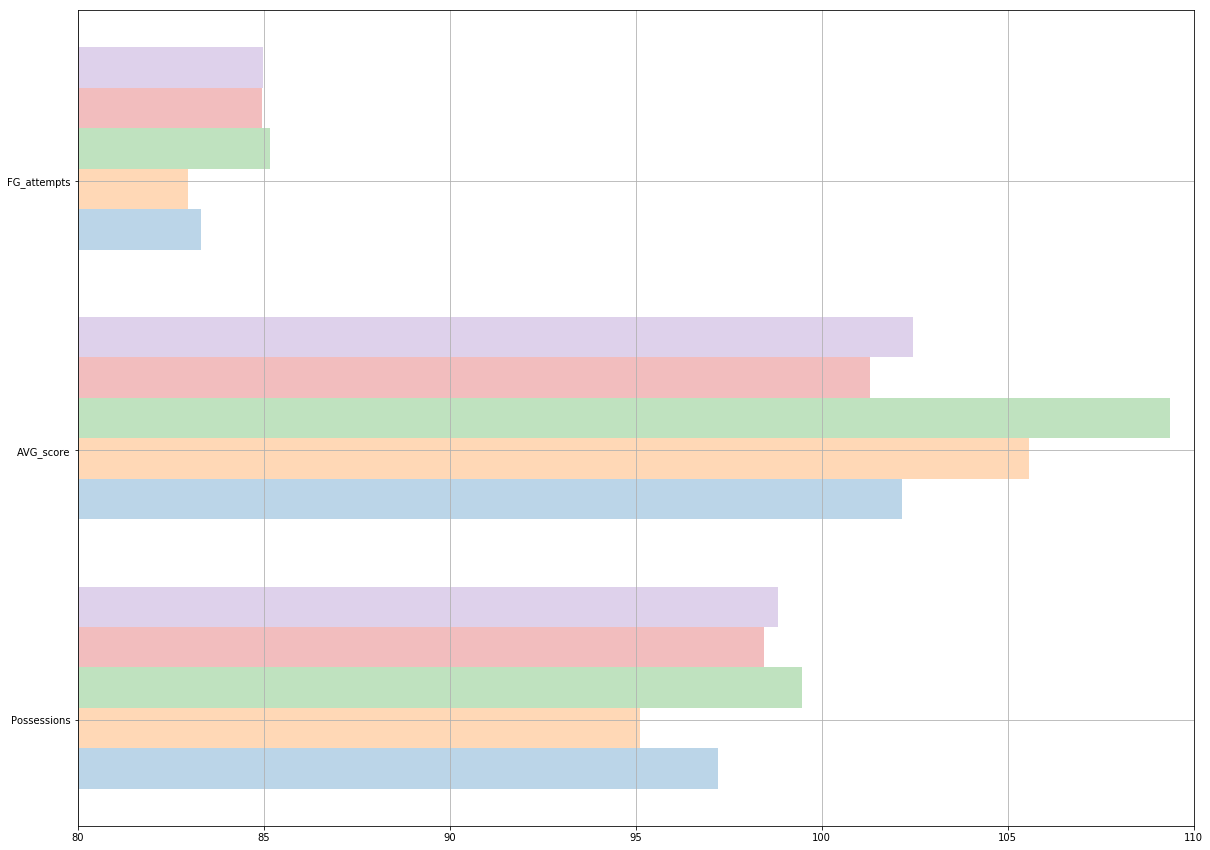

In [175]:
plt.figure(figsize=(20,15))
plt.barh(index-bar_width,c_0[0],bar_width,alpha=.3)
plt.barh(index,c_1[0],bar_width,alpha=.3)
plt.barh(index+bar_width,c_2[0],bar_width,alpha=.3)
plt.barh(index+2*bar_width,c_3[0],bar_width,alpha=.3)
plt.barh(index+3*bar_width,c_4[0],bar_width,alpha=.3)
plt.yticks(index + bar_width / 5, c_4.index)
plt.xlim((80,110))
plt.grid()

In [ ]:
small_df=s2018[['game_id','team','home_team','Total_PTS']]

In [ ]:
joined=small_df.join(comb_3,on='team')

In [ ]:
joined_group = joined.groupby(['game_id','team']).mean()

In [ ]:
joined_group

In [ ]:
pd.scatter_matrix(joined_group.drop('home_team',axis=1),figsize=(15,20))

In [ ]:
joined_group.drop('home_team',axis=1).corr()

In [ ]:
hawks_id = np.unique(joined['game_id'][joined['team']=='Hawks'])

In [ ]:
joined_game=joined.groupby(['game_id','team']).mean()

In [ ]:
inde=[joined_game.index[i][0] in list(hawks_id) for i in range(len(joined_game))]

In [ ]:
joined_game[inde]

In [ ]:
grouped_games_score = s2018.groupby(['game_id','team'])
game_totals=pd.DataFrame(grouped_games_score.sum()['PTS'])

In [ ]:
game_totals